In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data from Xavier's Laptop

In [3]:
rosbag_path = '/home/xavier/projects/datasets/bag_1.csv'

data = pd.read_csv(rosbag_path)['data']
data.info()
data.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 2683 entries, 0 to 2682
Series name: data
Non-Null Count  Dtype  
--------------  -----  
2683 non-null   float64
dtypes: float64(1)
memory usage: 21.1 KB


0.002852471882221394

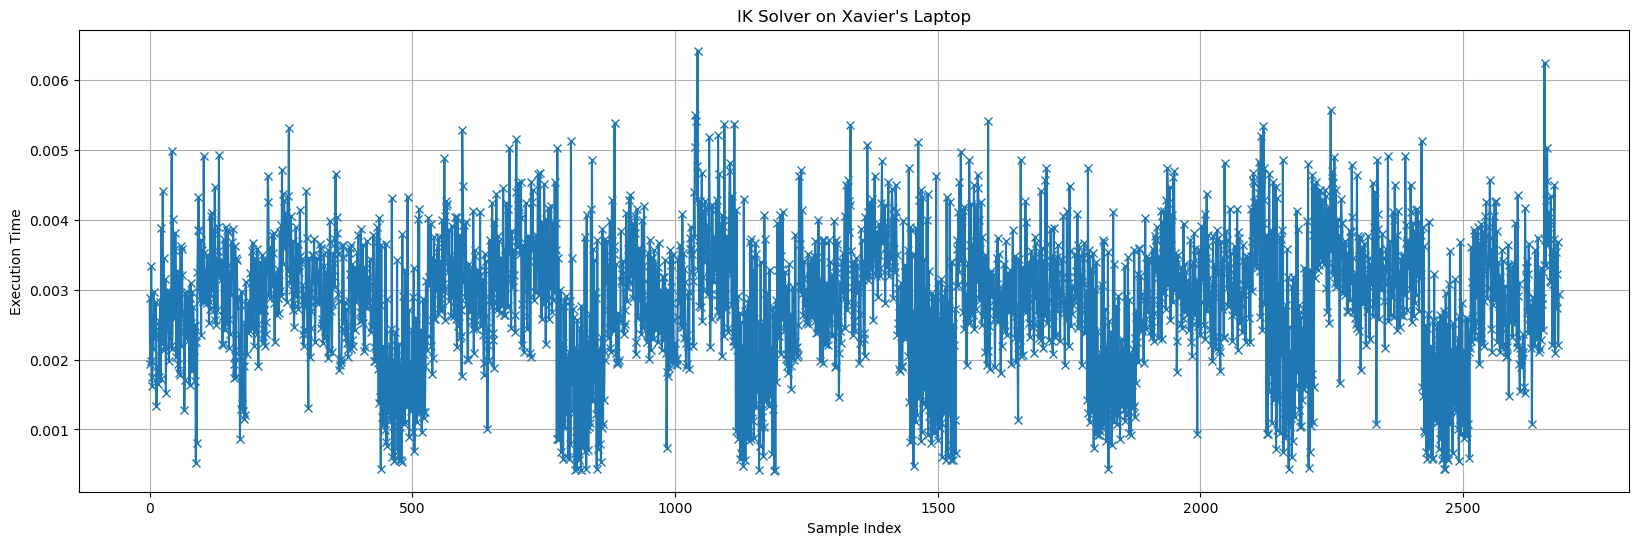

In [4]:
plt.figure(figsize=(20, 6))
data.plot(kind='line', marker='x', title='IK Solver on Xavier\'s Laptop')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()

## Data from Ross

In [5]:
rosbag_path = '/home/xavier/projects/datasets/bag_2.csv'

data = pd.read_csv(rosbag_path)['data']
data.info()
data.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 2681 entries, 0 to 2680
Series name: data
Non-Null Count  Dtype  
--------------  -----  
2681 non-null   float64
dtypes: float64(1)
memory usage: 21.1 KB


0.013066727519955242

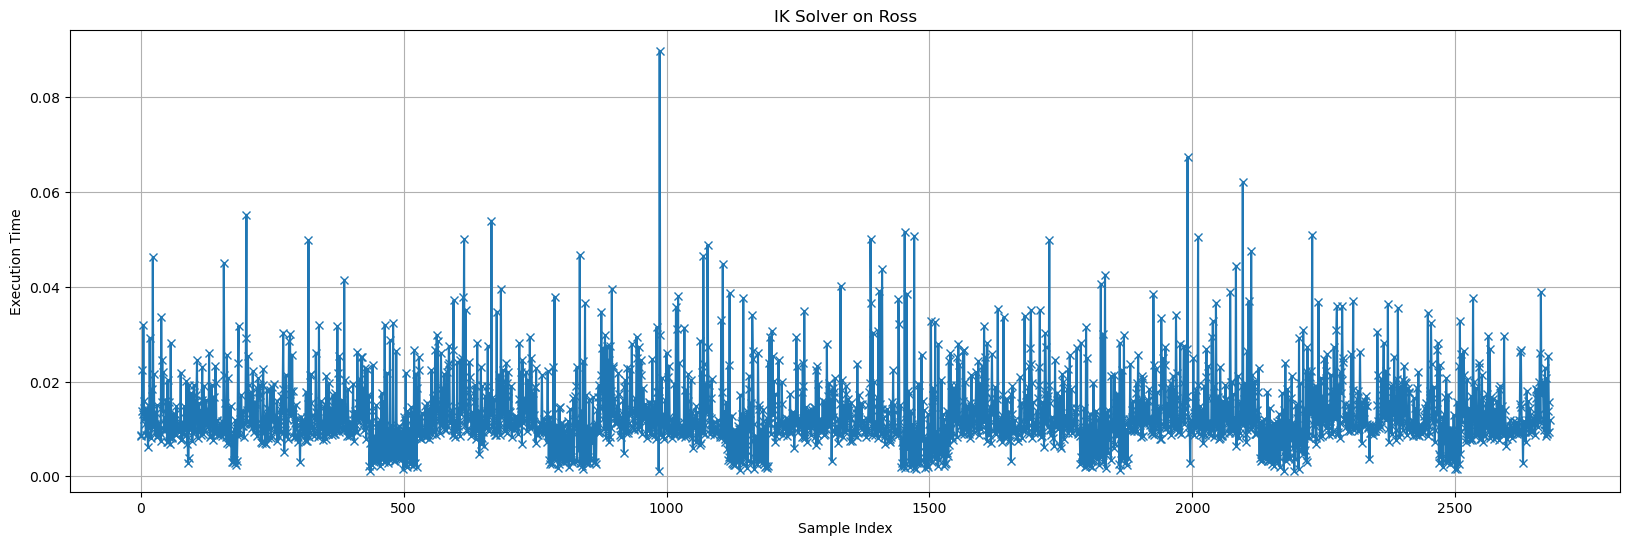

In [6]:
plt.figure(figsize=(20, 6))
data.plot(kind='line', marker='x', title='IK Solver on Ross')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()

## Analyzing the IK solver execution time on Ross
- This data was generated while using the actual arm.
- This data shows that reducing the size of the linear step and the allowable tolerance significantly reduces the execution time of the IK solver.

In [7]:
import csv

from pathlib import Path

from rosbags.highlevel import AnyReader
from rosbags.typesys import Stores, get_typestore

import os

"""
Writes the data from the ros bag to a csv file
"""

topic_name = '/px100/ik_solver_execution_time'
datasets_path = '../../../datasets'
ros_bag = 'ik_solver_execution_time3'
csv_file_name = 'ik_solver_execution_time3.csv'

csv_file_path = os.path.join(datasets_path, csv_file_name)
bagpath = Path(os.path.join(datasets_path, ros_bag))

typestore = get_typestore(Stores.ROS2_HUMBLE)

# Create reader instance and open for reading.
with AnyReader([bagpath], default_typestore=typestore) as reader:
    connections = [
        x for x in reader.connections if x.topic == topic_name]

    csv_file = open(csv_file_path, 'w', newline='')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['execution_time'])
    rows = []

    for connection, timestamp, rawdata in reader.messages(connections=connections):
        msg = reader.deserialize(rawdata, connection.msgtype)
        rows.append([msg.data])
        if len(rows) >= 1000:
            csv_writer.writerows(rows)
            rows = []

In [8]:
rosbag_path = '/home/xavier/projects/datasets/ik_solver_execution_time1.csv'

data = pd.read_csv(rosbag_path)['execution_time']
data.info()
data.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: execution_time
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


0.00898214569

## IK solver execution time with reduced step size

In [9]:
rosbag_path = '/home/xavier/projects/datasets/ik_solver_execution_time2.csv'

data = pd.read_csv(rosbag_path)['execution_time']
data.info()
data.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 8000 entries, 0 to 7999
Series name: execution_time
Non-Null Count  Dtype  
--------------  -----  
8000 non-null   float64
dtypes: float64(1)
memory usage: 62.6 KB


0.004928250892625

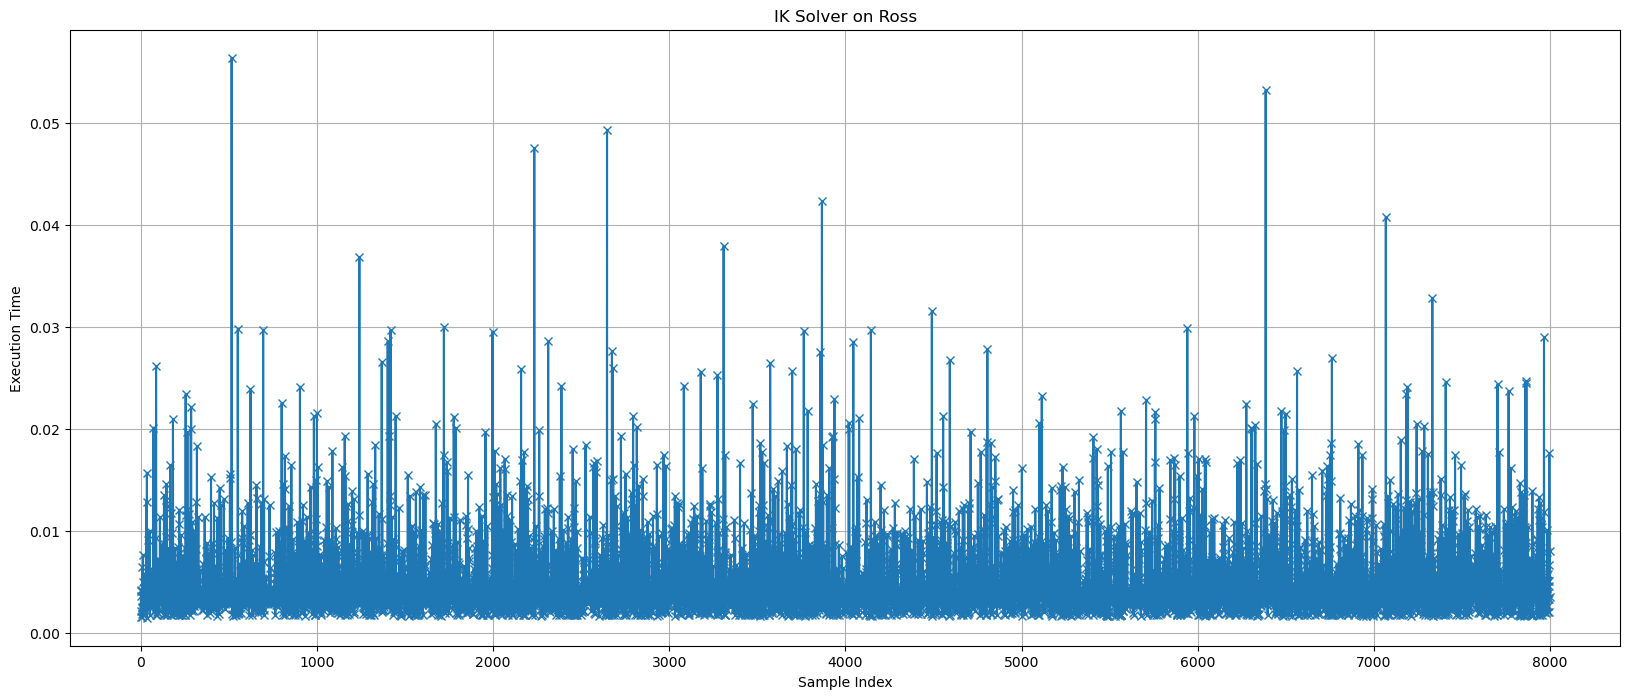

In [10]:
plt.figure(figsize=(20, 8))
data.plot(kind='line', marker='x', title='IK Solver on Ross')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()

In [11]:
rosbag_path = '/home/xavier/projects/datasets/ik_solver_execution_time3.csv'

data = pd.read_csv(rosbag_path)['execution_time']
data.info()
data.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 15874 entries, 0 to 15873
Series name: execution_time
Non-Null Count  Dtype  
--------------  -----  
15874 non-null  float64
dtypes: float64(1)
memory usage: 124.1 KB


0.00253103555581454

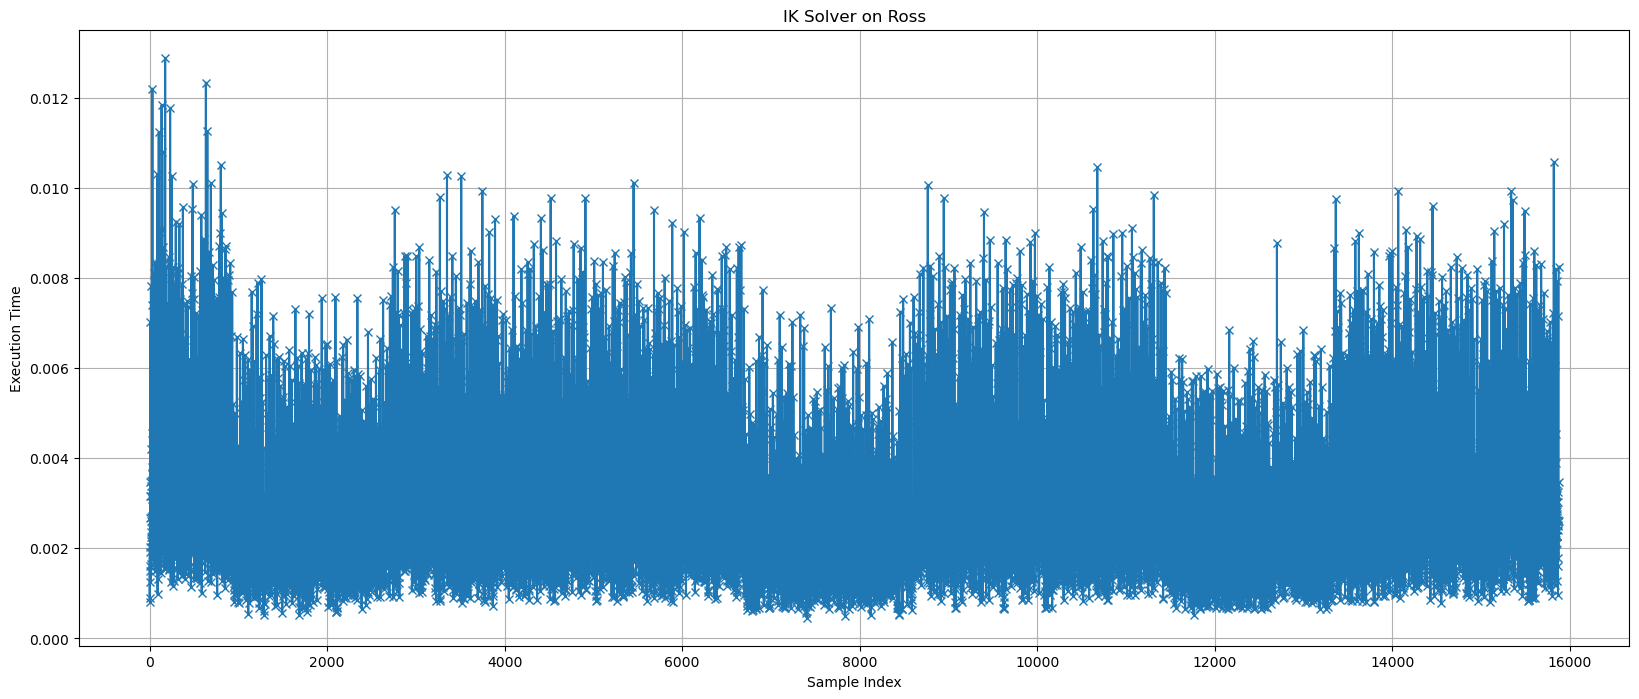

In [12]:
plt.figure(figsize=(20, 8))
data.plot(kind='line', marker='x', title='IK Solver on Ross')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()